# Homework 12: Classification


**Reading**: 
* [Classification](https://data8-demo.jupyterlite.app/chapters/17/classification)

Please complete this notebook by filling in the cells provided.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

For all problems that you must write our explanations and sentences for, you must provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use max_temperature in your answer to one question, do not reassign it later on.

In [1]:
# Don't change this cell; just run it. 
import numpy as np
from datascience import *

In [2]:
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

In [4]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.row(0)

Row(Age=48, Blood Pressure=70, Specific Gravity=1.005, Albumin=4, Sugar=0, Red Blood Cells='normal', Pus Cell='abnormal', Pus Cell clumps='present', Bacteria='notpresent', Glucose=117, Blood Urea=56, Serum Creatinine=3.8, Sodium=111, Potassium=2.5, Hemoglobin=11.2, Packed Cell Volume=32, White Blood Cell Count=6700, Red Blood Cell Count=3.9, Hypertension='yes', Diabetes Mellitus='no', Coronary Artery Disease='no', Appetite='poor', Pedal Edema='yes', Anemia='yes', Class=1)

In [5]:
ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class')
)
ckd

Hemoglobin,Glucose,White Blood Cell Count,Class
-0.865744,-0.221549,-0.569768,1
-1.45745,-0.947597,1.16268,1
-1.00497,3.84123,-1.27558,1
-2.81488,0.396364,0.809777,1
-2.08395,0.643529,0.232293,1
-1.35303,-0.561402,-0.505603,1
-0.413266,2.04928,0.360623,1
-1.28342,-0.947597,3.34429,1
-1.10939,1.87936,-0.409356,1
-1.35303,0.489051,1.96475,1


In [6]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)

In [7]:
ckd

Class,Hemoglobin,Glucose,White Blood Cell Count,Color
0,0.456884,0.133751,0.617283,gold
0,1.153,-0.947597,0.424788,gold
0,0.770138,-0.762223,0.200211,gold
0,0.596108,-0.190654,-0.73018,gold
0,-0.239236,-0.49961,-0.0564489,gold
0,-0.0304002,-0.159758,0.232293,gold
0,0.282854,-0.00527964,0.71353,gold
0,0.108824,-0.623193,0.200211,gold
0,0.0740178,-0.515058,-0.0243664,gold
0,0.83975,-0.422371,-1.33975,gold


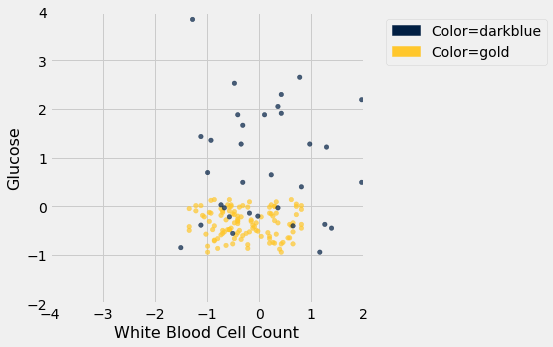

In [8]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Color')
plt.xlim(-4, 2)
plt.ylim(-2, 4);

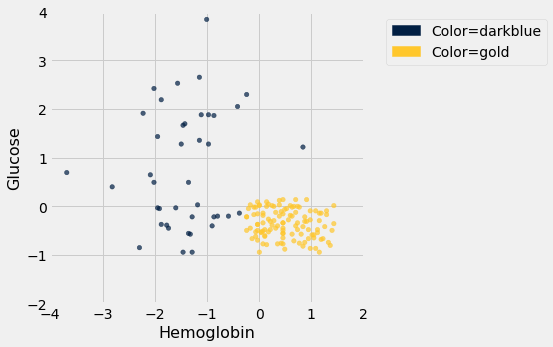

In [9]:
ckd.scatter('Hemoglobin', 'Glucose', group='Color')
plt.xlim(-4, 2)
plt.ylim(-2, 4);

In [10]:
shuffled_ckd = ckd.sample(with_replacement=False)
training = shuffled_ckd.take(np.arange(79))
testing = shuffled_ckd.take(np.arange(79, 158))

In [11]:
training

Class,Hemoglobin,Glucose,White Blood Cell Count,Color
0,-0.0304002,-0.700432,-0.85851,gold
0,1.43145,0.0101682,-1.21142,gold
0,0.0740178,-0.515058,-0.0243664,gold
0,0.978974,-0.283341,-0.152696,gold
1,-1.87512,2.18831,1.96475,darkblue
0,0.31766,-0.453267,-0.537686,gold
0,0.944168,-0.669536,0.200211,gold
0,0.874556,-0.221549,0.0397985,gold
0,-0.0304002,-0.49961,-0.377273,gold
0,-0.100012,-0.0207275,-0.377273,gold


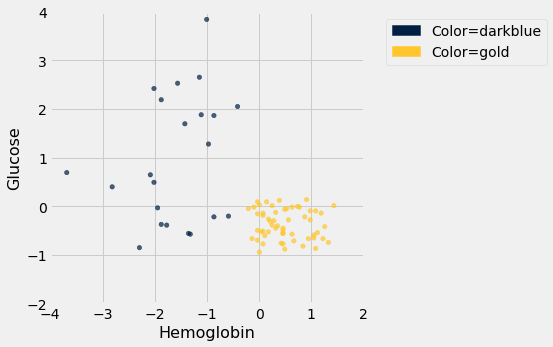

In [12]:
training.scatter('Hemoglobin', 'Glucose', group='Color')
plt.xlim(-4, 2)
plt.ylim(-2, 4);

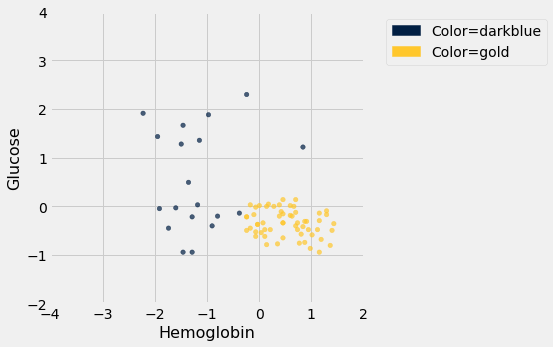

In [13]:
testing.scatter('Hemoglobin', 'Glucose', group='Color')
plt.xlim(-4, 2)
plt.ylim(-2, 4);

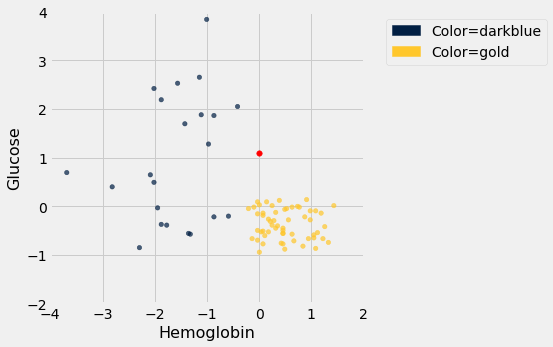

In [14]:
alice = make_array(0, 1.1)

training.scatter('Hemoglobin', 'Glucose', group='Color')
plt.xlim(-4, 2)
plt.ylim(-2, 4)
plt.scatter(alice.item(0), alice.item(1), color='red', s=30);

In [15]:
training_set= training.select('Class','Hemoglobin','Glucose')
test_set = testing.select('Class','Hemoglobin','Glucose')

In [16]:
training_set

Class,Hemoglobin,Glucose
0,-0.0304002,-0.700432
0,1.43145,0.0101682
0,0.0740178,-0.515058
0,0.978974,-0.283341
1,-1.87512,2.18831
0,0.31766,-0.453267
0,0.944168,-0.669536
0,0.874556,-0.221549
0,-0.0304002,-0.49961
0,-0.100012,-0.0207275


In [17]:
test_set

Class,Hemoglobin,Glucose
0,1.153,-0.298788
0,0.874556,-0.746776
0,0.909362,-0.314236
0,0.700526,-0.406923
0,0.700526,-0.128862
0,0.978974,-0.870358
0,0.213242,-0.484162
0,-0.169624,-0.453267
0,-0.239236,-0.221549
0,0.0392118,-0.545954


In [18]:
training_attributes = training.select('Hemoglobin', 'Glucose')
training_attributes

Hemoglobin,Glucose
-0.0304002,-0.700432
1.43145,0.0101682
0.0740178,-0.515058
0.978974,-0.283341
-1.87512,2.18831
0.31766,-0.453267
0.944168,-0.669536
0.874556,-0.221549
-0.0304002,-0.49961
-0.100012,-0.0207275


In [19]:
alice

array([0. , 1.1])

In [20]:
patient3 = np.array(training_attributes.row(3))
patient3

array([ 0.97897356, -0.28334063])

In [21]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [22]:
distance(alice,patient3)

1.6947036688947956

In [23]:
closest(training_attributes, alice, 5)

Hemoglobin,Glucose,Distance
-0.970162,1.27689,0.986156
-0.0304002,0.0874074,1.01305
0.14363,0.0874074,1.02273
-0.413266,2.04928,1.03534
0.387272,0.118303,1.05532


In [24]:
closest(training_attributes, patient3, 5)

Hemoglobin,Glucose,Distance
0.978974,-0.283341,0
0.874556,-0.221549,0.121331
0.978974,-0.0979666,0.185374
1.08339,-0.0979666,0.21276
1.18781,-0.14431,0.250882


In [25]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Class')
    def classify_testrow(row):
        return classify(training, row, k)
    c = test_attributes.apply(classify_testrow)
    return count_equal(c, test.column('Class')) / test.num_rows

In [26]:
evaluate_accuracy(training_set, test_set, 5)

0.9746835443037974